In [5]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

In [6]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

train_gen = datagen.flow_from_directory(
    "../Data/Alzheimerr/train_set/",
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)

test_gen = datagen.flow_from_directory(
    "../Data/Alzheimerr/test_set/",
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

Found 7200 images belonging to 4 classes.
Found 800 images belonging to 4 classes.


In [7]:
model = models.Sequential([
    # 1st Convolutional block: Looks for simple edges
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    layers.MaxPooling2D((2, 2)),

    # 2nd Convolutional block: Looks for complex shapes
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # 3rd Convolutional block
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Final "Classifier" part (like the ANN)
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(4, activation='softmax') # 4 classes for Alzheimer's stages
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

c:\Users\Acer\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,305,156 (12.61 MB)

 Trainable params: 3,305,156 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
print("Training the CNN... this is the most important part!")
history = model.fit(
    train_gen,
    validation_data=test_gen,
    epochs=15 # A few more epochs for better learning
)

Training the CNN... this is the most important part!
Epoch 1/15
225/225 ━━━━━━━━━━━━━━━━━━━━ 54s 230ms/step - accuracy: 0.4349 - loss: 1.2020 - val_accuracy: 0.5713 - val_loss: 0.9345
Epoch 2/15
225/225 ━━━━━━━━━━━━━━━━━━━━ 42s 186ms/step - accuracy: 0.6074 - loss: 0.8660 - val_accuracy: 0.6525 - val_loss: 0.7619
Epoch 3/15
225/225 ━━━━━━━━━━━━━━━━━━━━ 47s 210ms/step - accuracy: 0.6565 - loss: 0.7453 - val_accuracy: 0.6525 - val_loss: 0.7363
Epoch 4/15
225/225 ━━━━━━━━━━━━━━━━━━━━ 51s 228ms/step - accuracy: 0.6908 - loss: 0.6747 - val_accuracy: 0.6988 - val_loss: 0.6633
Epoch 5/15
225/225 ━━━━━━━━━━━━━━━━━━━━ 145s 506ms/step - accuracy: 0.7225 - loss: 0.6160 - val_accuracy: 0.7287 - val_loss: 0.6214
Epoch 6/15
225/225 ━━━━━━━━━━━━━━━━━━━━ 41s 180ms/step - accuracy: 0.7514 - loss: 0.5564 - val_accuracy: 0.7375 - val_loss: 0.6014
Epoch 7/15
225/225 ━━━━━━━━━━━━━━━━━━━━ 70s 310ms/step - accuracy: 0.7715 - loss: 0.5117 - val_accuracy: 0.7513 - val_loss: 0.5866
Epoch 8/15
225/225 ━━━━━━━━━━

In [13]:
import os
# Create the folder if it's missing
if not os.path.exists('../Outputs'):
    os.makedirs('../Outputs')

# This is the line that actually creates the file!
model.save('../Outputs/alzheimer_cnn_model.h5')
print("File successfully created in Outputs folder!")

File successfully created in Outputs folder!


In [14]:
import os
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

# 1. LOAD THE MODEL (This fixes the NameError)
# We load the one you saved in the Outputs folder earlier
model_path = '../Outputs/alzheimer_cnn_model.h5'
model = load_model(model_path)
print("Model loaded successfully!")

# 2. Automatically find the first image
folder_path = "../Data/Alzheimerr/test_set/MildDemented/"
all_images = os.listdir(folder_path)
first_image_name = all_images[0] 
img_path = os.path.join(folder_path, first_image_name)
print(f"Testing with image: {img_path}")

# 3. Load and resize the image
img = image.load_img(img_path, target_size=(128, 128))

# 4. Convert to array and prepare for model
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0) 

# 5. Predict!
prediction = model.predict(img_array)
predicted_class = np.argmax(prediction)

# 6. Show results
# Manually defining the classes to keep it simple
classes = ['MildDemented', 'ModerateDemented', 'NonDemented', 'VeryMildDemented']
print(f"The model predicts this image is: {classes[predicted_class]}")

Model loaded successfully!
Testing with image: ../Data/Alzheimerr/test_set/MildDemented/MildDemented (1).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
The model predicts this image is: VeryMildDemented


CNN Model and Plot saved to Outputs folder!


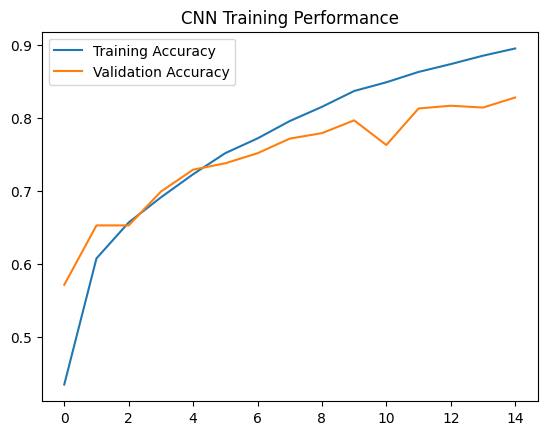

In [16]:
# Save the CNN model file
model.save('../Outputs/alzheimer_cnn_model.h5')

# Save the CNN accuracy plot
plt.figure()
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Training Performance')
plt.legend()
plt.savefig('../Outputs/cnn_plot.png')

print("CNN Model and Plot saved to Outputs folder!")